# Computational Drug Discovery [Part 4] Model Building
in this **part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

# 1. Import libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 2. Load the data set

In [57]:
df = pd.read_csv('acetylcholinesterase_calculated_and_prepared_data_for_model_building.csv')
df

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,11091,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.889410
11092,11092,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.698970
11093,11093,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.226214
11094,11094,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.920819


# 3. Input features
The **Acetylcholinesterase** data set contains 881 imput feature and 1 output variable (pIC50 values).

## 3.1. Input features

In [58]:
X = df.drop('pIC50', axis=1)

# prompt: remove extra index column
X = X.iloc[:, 1:]

X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11094,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 3.2. Output features

In [59]:
Y = df.pIC50
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
11091,5.889410
11092,5.698970
11093,6.226214
11094,5.920819


## 3.3. Let's examine the data dimension

In [60]:
X.shape

(11096, 881)

In [61]:
Y.shape

(11096,)

## 3.4. Remove low variance features

In [62]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X =  selection.fit_transform(X)

In [63]:
X.shape

(11096, 118)

# 4. Data split (80/20 ratio)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [65]:
X_train.shape, Y_train.shape

((8876, 118), (8876,))

In [66]:
X_test.shape, Y_test.shape

((2220, 118), (2220,))

# 5. Building a Regression Model using Random Forest

In [67]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5236581946617376

In [68]:
Y_pred = model.predict(X_test)

# 6. Scatter Plot of Experimental vs Predicted pIC50 values

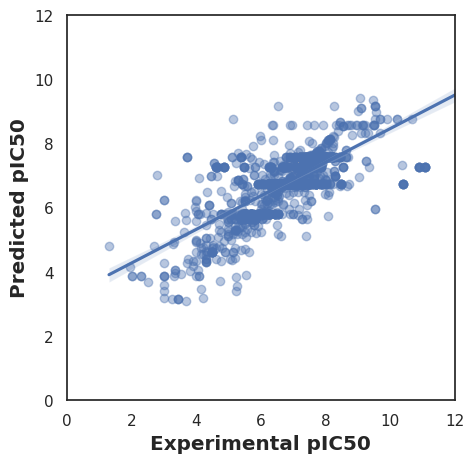

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('prediction.pdf')